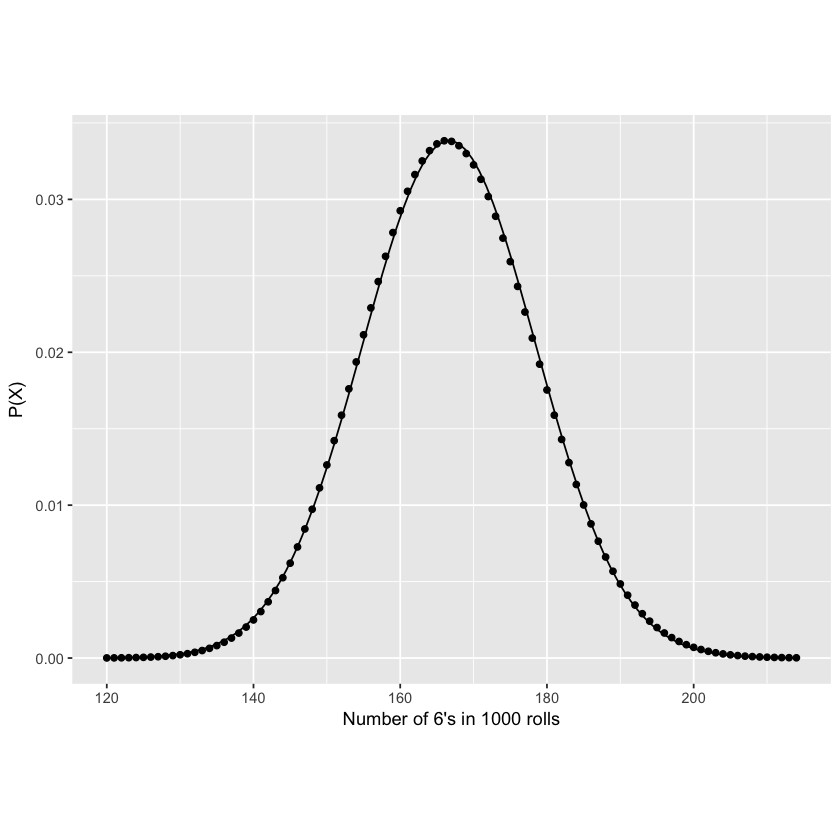

In [1]:
library(ggplot2)
library(RColorBrewer)
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

# 2.3

n <- 1000
p <- 1/6
mu <- n * p
sigma <- sqrt(n * p * (1-p))
df <- data.frame(x=round(mu - 4 * sigma):round(mu + 4 * sigma))
df$binom <- dbinom(df$x, size=n, prob=p)

ggplot(df, aes(x=x, y=binom)) + 
    geom_point() +
    stat_function(fun=dnorm,args=list(mean=mu, sd=sigma)) +
    theme(aspect.ratio=3/4) + 
    xlab("Number of 6's in 1000 rolls") + 
    ylab("P(X)")

In [2]:
percentiles <- c(0.05, 0.25, 0.50, 0.75, 0.95)
qnorm(percentiles, mu, sigma)

[1] 119.1838 147.1958 166.6667 186.1375 214.1495

[1] 0.0875

5%         95% 
-0.03388618  0.35501938

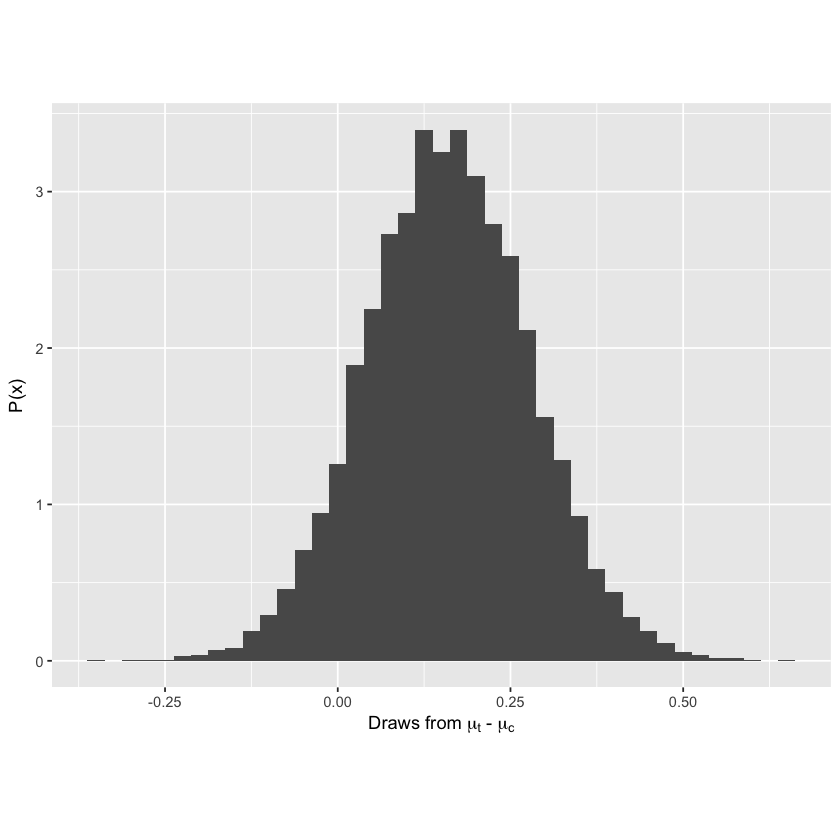

In [16]:
set.seed(33)

sample_size <- 10000
mu_t_samples <- rt(sample_size, 35) * sqrt(0.0057) + 1.173
mu_c_samples <- rt(sample_size, 31) * sqrt(0.0075) + 1.013
diff_df <- data.frame(diff=(mu_t_samples - mu_c_samples))

ggplot(diff_df, aes(x=diff)) +
    geom_histogram(aes(y=..density..), binwidth=0.025) + 
    theme(aspect.ratio=3/4) + 
    xlab(expression('Draws from '*mu[t]*' - '*mu[c])) + 
    ylab("P(x)")

sum(diff_df < 0) / sample_size
diff_cdf <- ecdf(diff_df$diff)
quantile(diff_cdf, c(0.05, 0.95))

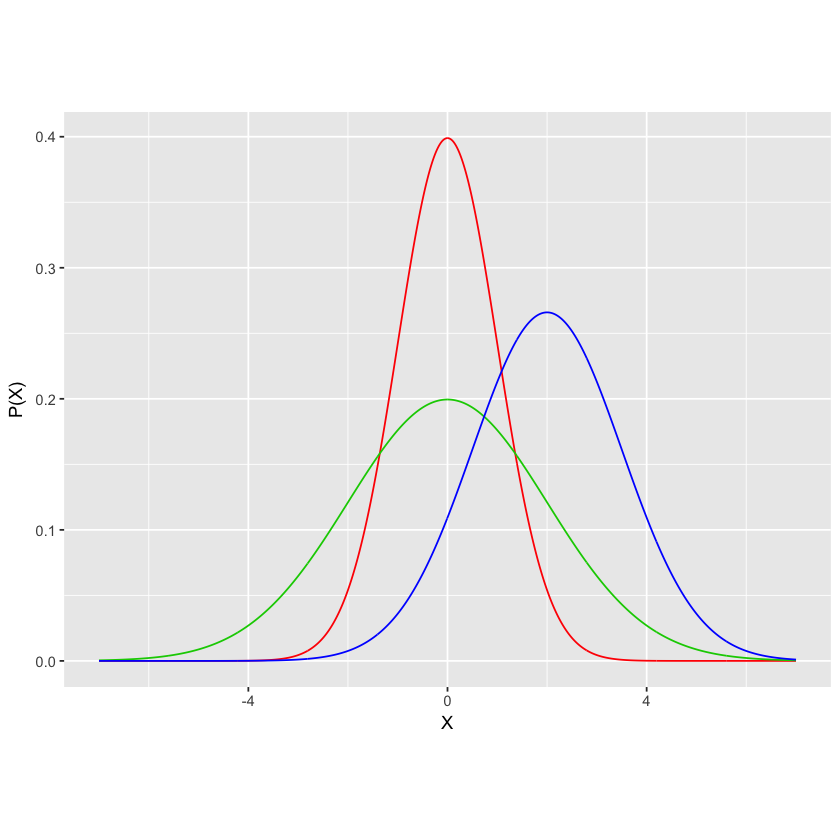

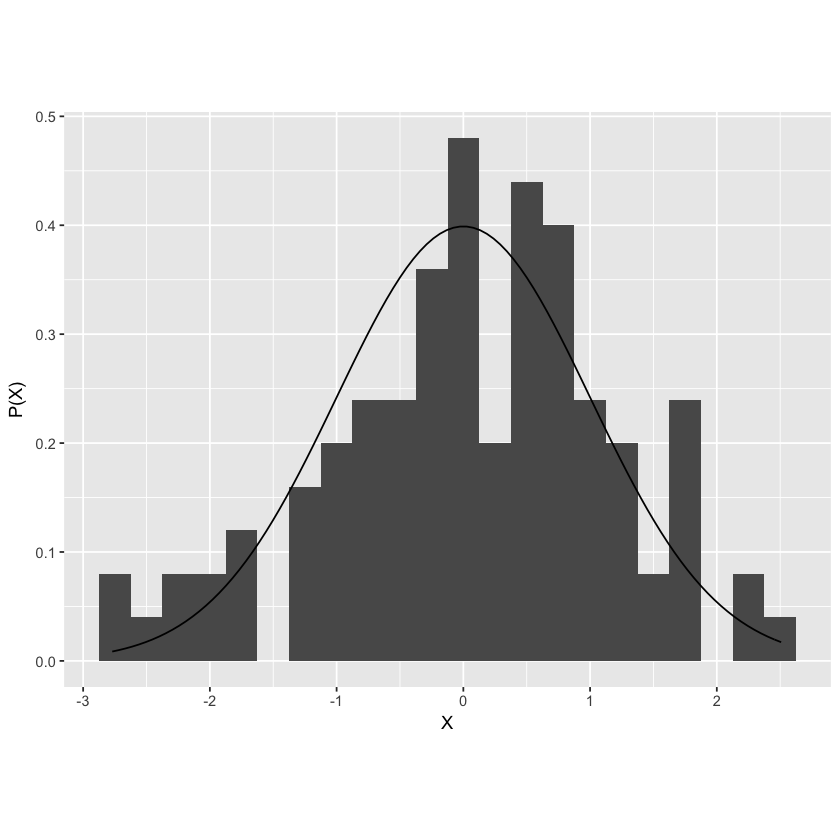

In [180]:
x <- seq(-7, 7, length.out = 1000)
normal_x_data <- data.frame(x=x,
                           y1=dnorm(x, 0, 1),
                           y2=dnorm(x, 0, 2),
                           y3=dnorm(x, 2, 1.5))

ggplot(normal_x_data, aes(x=x)) + 
    geom_line(aes(y=y1), color=2) + 
    geom_line(aes(y=y2), color=3) + 
    geom_line(aes(y=y3), color=4) + 
    scale_colour_brewer() + 
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

#     stat_function(fun=dnorm,args=list(mean=0, sd=1)) +
#     stat_function(fun=dnorm,args=list(mean=0, sd=2)) +
#     stat_function(fun=dnorm,args=list(mean=2, sd=1.5)) +

sample <- data.frame(data=rnorm(mean=0, sd=1, n=100))

ggplot(sample, aes(x=data)) + 
    geom_histogram(aes(y=..density..), binwidth=0.25) + 
    stat_function(fun=dnorm,args=list(mean=0, sd=1)) +
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

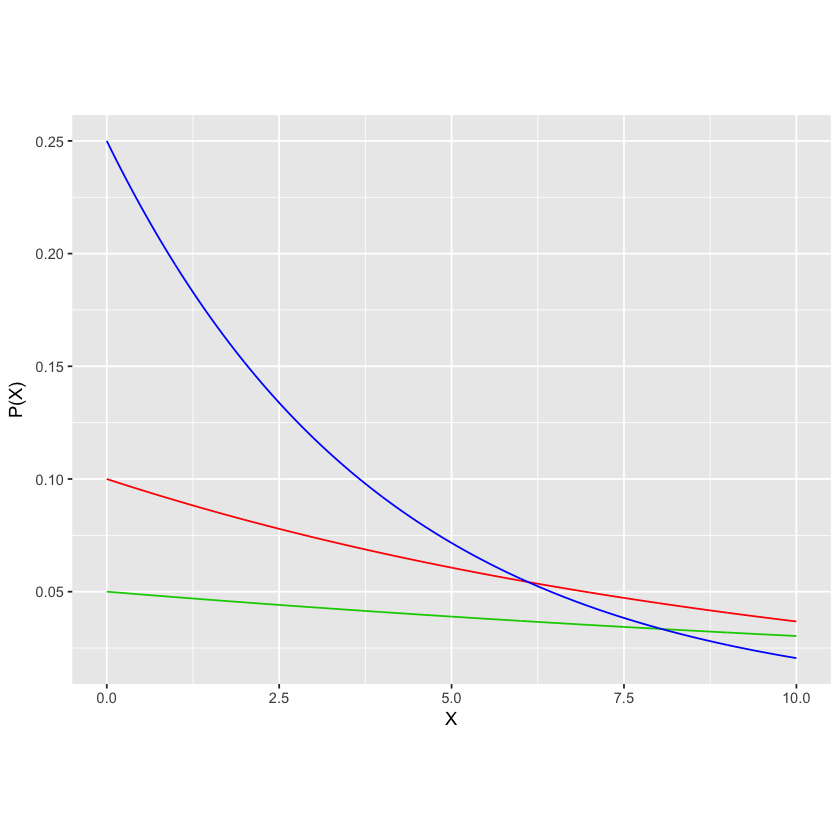

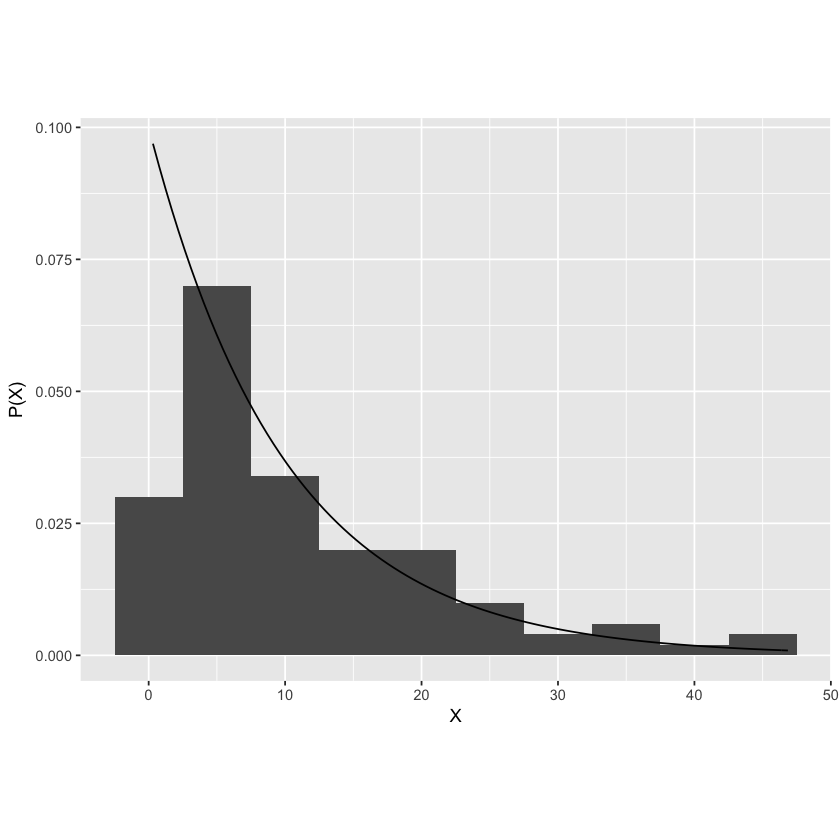

In [181]:
x <- seq(0, 10, length.out = 1000)
exp_x_data <- data.frame(x=x,
                           y1=dexp(x, 0.1),
                           y2=dexp(x, 0.05),
                           y3=dexp(x, 0.25))

ggplot(exp_x_data, aes(x=x)) + 
    scale_color_brewer(palette="Dark2") + 
    geom_line(aes(y=y1), color=2) + 
    geom_line(aes(y=y2), color=3) + 
    geom_line(aes(y=y3), color=4) + 
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

#     stat_function(fun=dnorm,args=list(mean=0, sd=1)) +
#     stat_function(fun=dnorm,args=list(mean=0, sd=2)) +
#     stat_function(fun=dnorm,args=list(mean=2, sd=1.5)) +

sample <- data.frame(data=rexp(n=100, rate = 0.1))

ggplot(sample, aes(x=data)) + 
    geom_histogram(aes(y=..density..), binwidth=5) + 
    stat_function(fun=dexp,args=list(rate=0.1)) +
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

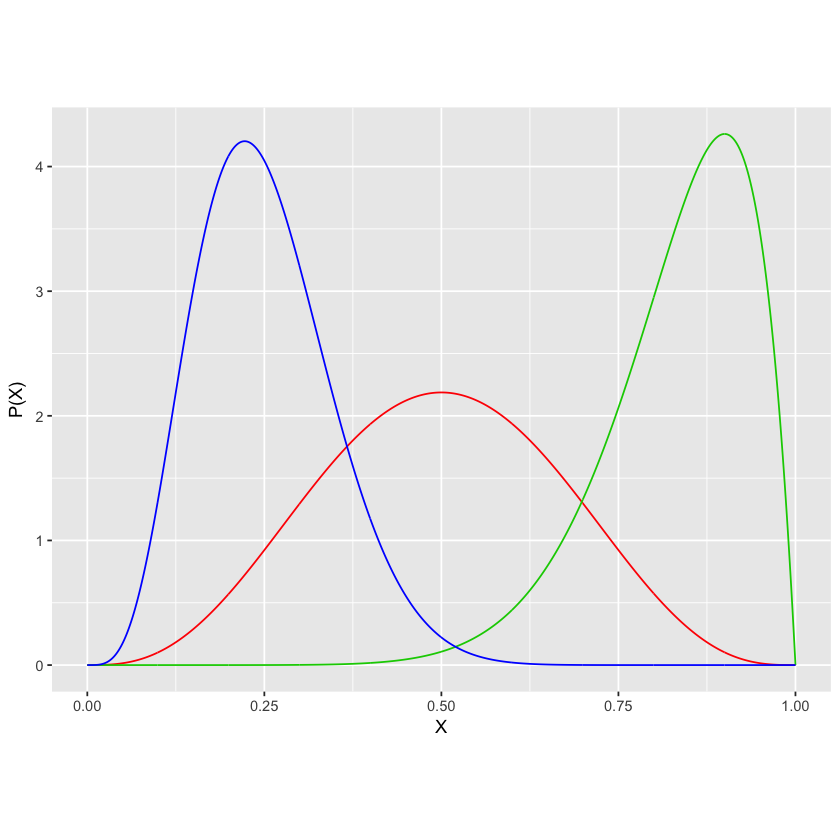

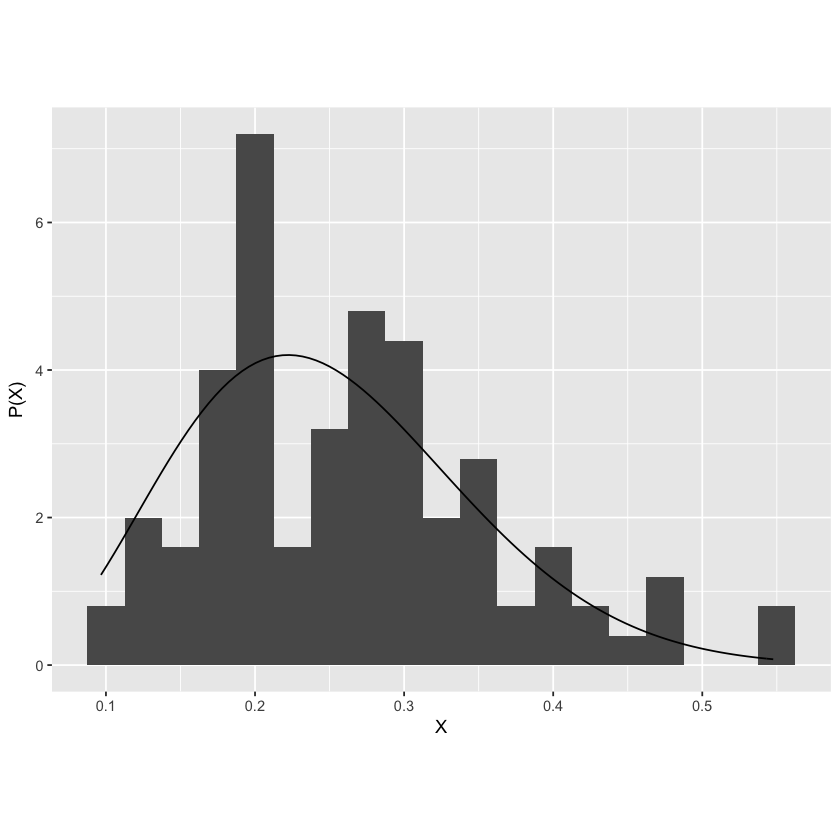

In [182]:
x <- seq(0, 1, length.out = 1000)
beta_x_data <- data.frame(x=x,
                           y1=dbeta(x, 4, 4),
                           y2=dbeta(x, 10, 2),
                           y3=dbeta(x, 5, 15))

ggplot(beta_x_data, aes(x=x)) + 
    scale_color_brewer(palette="Dark2") + 
    geom_line(aes(y=y1), color=2) + 
    geom_line(aes(y=y2), color=3) + 
    geom_line(aes(y=y3), color=4) +
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

#     stat_function(fun=dnorm,args=list(mean=0, sd=1)) +
#     stat_function(fun=dnorm,args=list(mean=0, sd=2)) +
#     stat_function(fun=dnorm,args=list(mean=2, sd=1.5)) +

sample <- data.frame(data=rbeta(n=100, 5, 15))
ggplot(sample, aes(x=data)) + 
    geom_histogram(aes(y=..density..), binwidth=0.025) + 
    stat_function(fun=dbeta,args=list(5, 15)) +
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

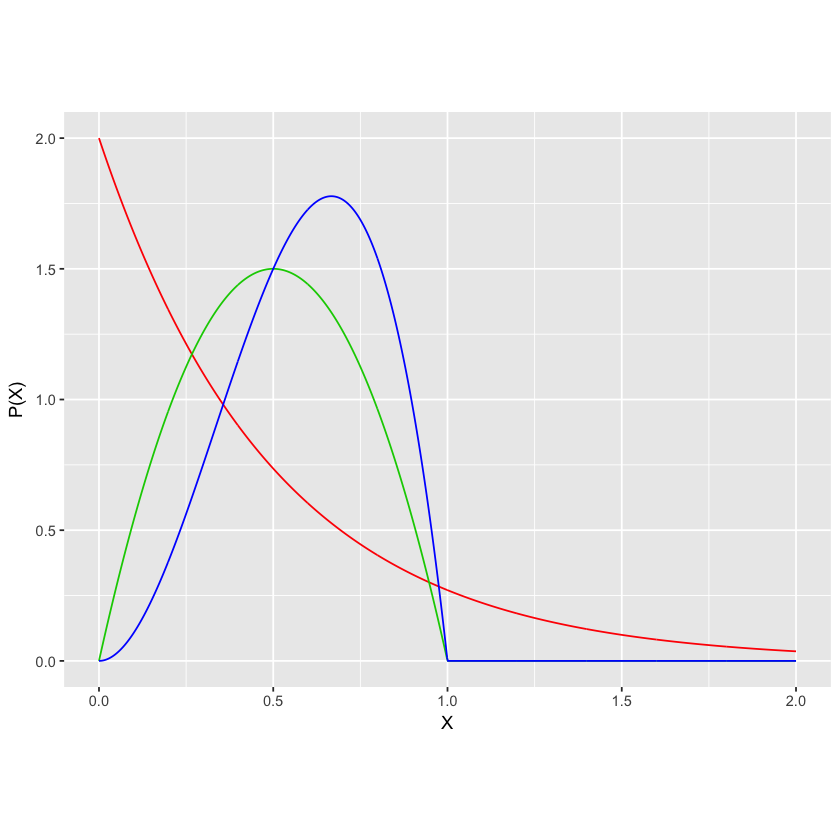

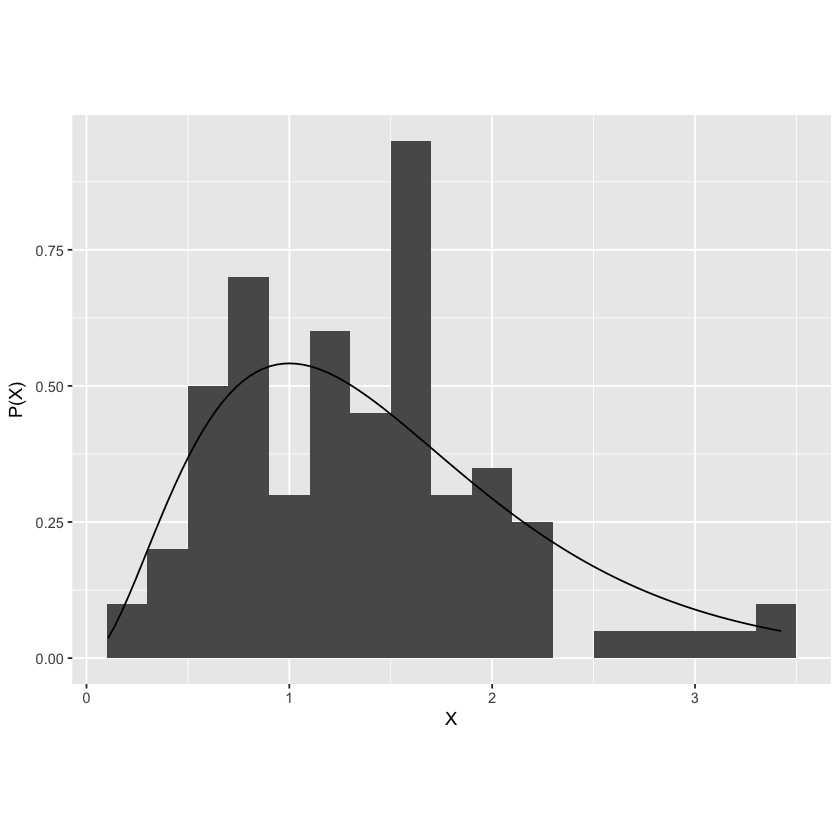

In [183]:
x <- seq(0, 2, length.out = 1000)
gamma_x_data <- data.frame(x=x,
                           y1=dgamma(x, 1, 2),
                           y2=dbeta(x, 2, 2),
                           y3=dbeta(x, 3, 2))

ggplot(gamma_x_data, aes(x=x)) + 
    scale_color_brewer(palette="Dark2") + 
    geom_line(aes(y=y1), color=2) + 
    geom_line(aes(y=y2), color=3) + 
    geom_line(aes(y=y3), color=4) + 
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

#     stat_function(fun=dnorm,args=list(mean=0, sd=1)) +
#     stat_function(fun=dnorm,args=list(mean=0, sd=2)) +
#     stat_function(fun=dnorm,args=list(mean=2, sd=1.5)) +

sample <- data.frame(data=rgamma(n=100, 3, 2))
ggplot(sample, aes(x=data)) + 
    geom_histogram(aes(y=..density..), binwidth=0.2) + 
    stat_function(fun=dgamma,args=list(3, 2)) +
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


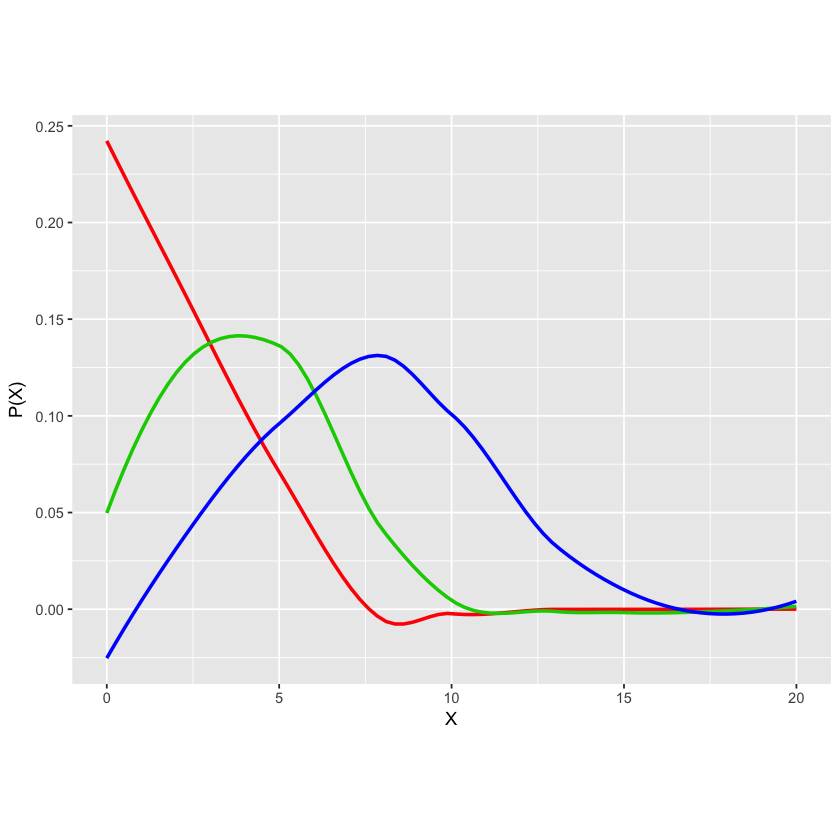

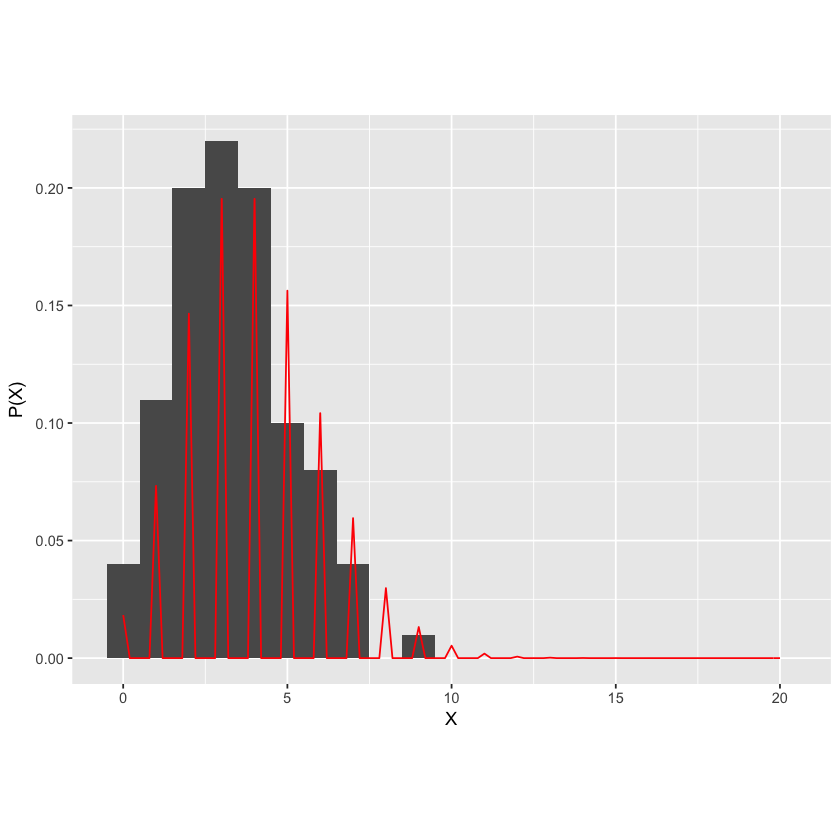

In [186]:
x <- 0:20
poisson_x_data <- data.frame(x=x,
                           y1=dpois(x, 2),
                           y2=dpois(x, 4),
                           y3=dpois(x, 8))

ggplot(poisson_x_data, aes(x=x)) + 
    scale_color_brewer(palette="Dark2") + 
    geom_smooth(aes(y=y1), se=FALSE, color=2) + 
    geom_smooth(aes(y=y2), se=FALSE, color=3) + 
    geom_smooth(aes(y=y3), se=FALSE, color=4) + 
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

#     stat_function(fun=dnorm,args=list(mean=0, sd=1)) +
#     stat_function(fun=dnorm,args=list(mean=0, sd=2)) +
#     stat_function(fun=dnorm,args=list(mean=2, sd=1.5)) +

sample <- data.frame(data=rpois(n=100, 4))
ggplot() + 
    geom_histogram(aes(x=data, y=..density..), data=sample, binwidth=1) + 
    stat_function(aes(x=x), data=poisson_x_data, fun=dpois,args=list(4), color=2) +
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

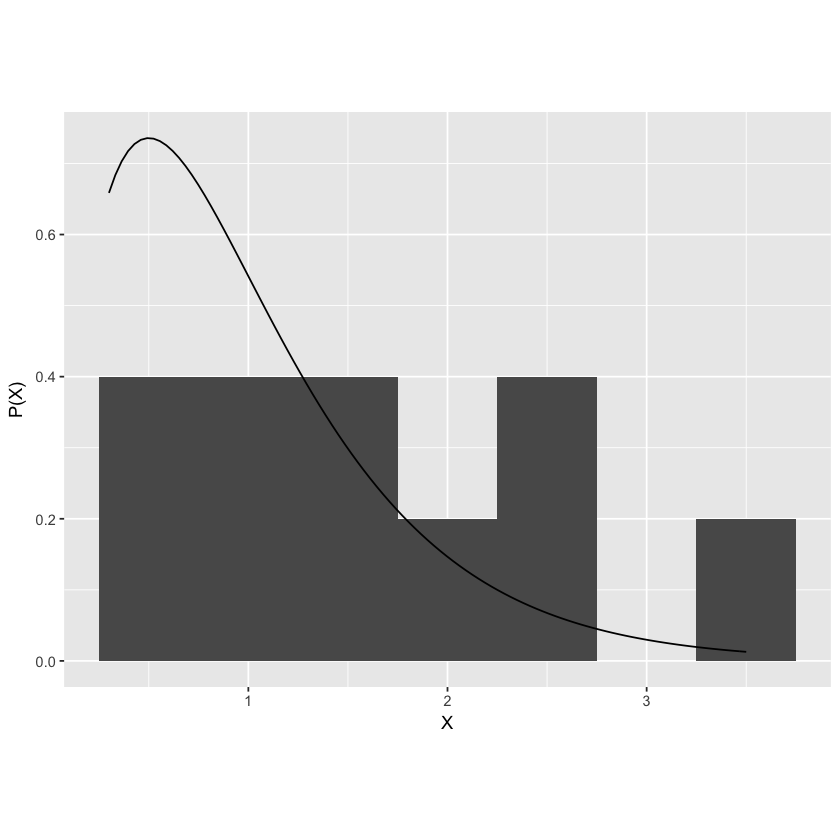

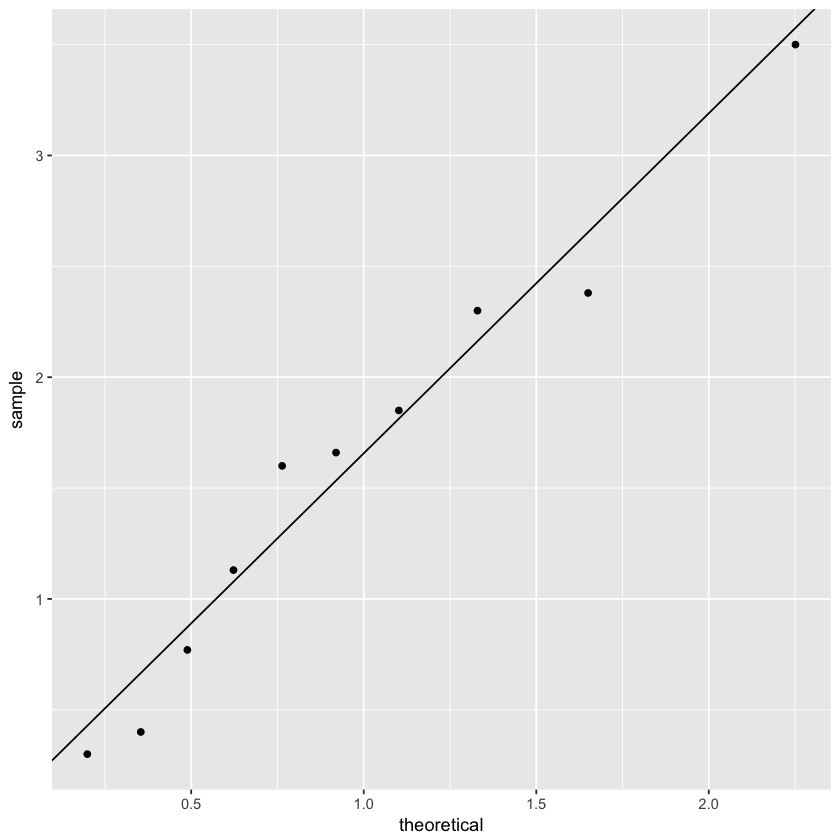

In [189]:
questionable_data <- c(1.6, 0.3, 0.4, 0.77, 1.85, 2.3, 3.5, 2.38, 1.13, 1.66)
data_df <- data.frame(sample=questionable_data)

ggplot(data_df) +
    geom_histogram(aes(x=sample, y=..density..), binwidth=0.5) + 
    stat_function(fun=dgamma,args=list(2, 2)) +
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

quantile_y <- quantile(questionable_data, c(0.25, 0.75))
quantilie_x <- qgamma(c(0.25, 0.75), 2, 2)
slope <- diff(quantile_y) / diff(quantilie_x)
int   <- quantile_y[1] - slope * quantilie_x[1]

ggplot(data_df) + 
    geom_qq(aes(sample=sample), distribution = stats::qgamma, dparams = list(2, 2)) + 
    geom_abline(aes(slope=slope, intercept=int))

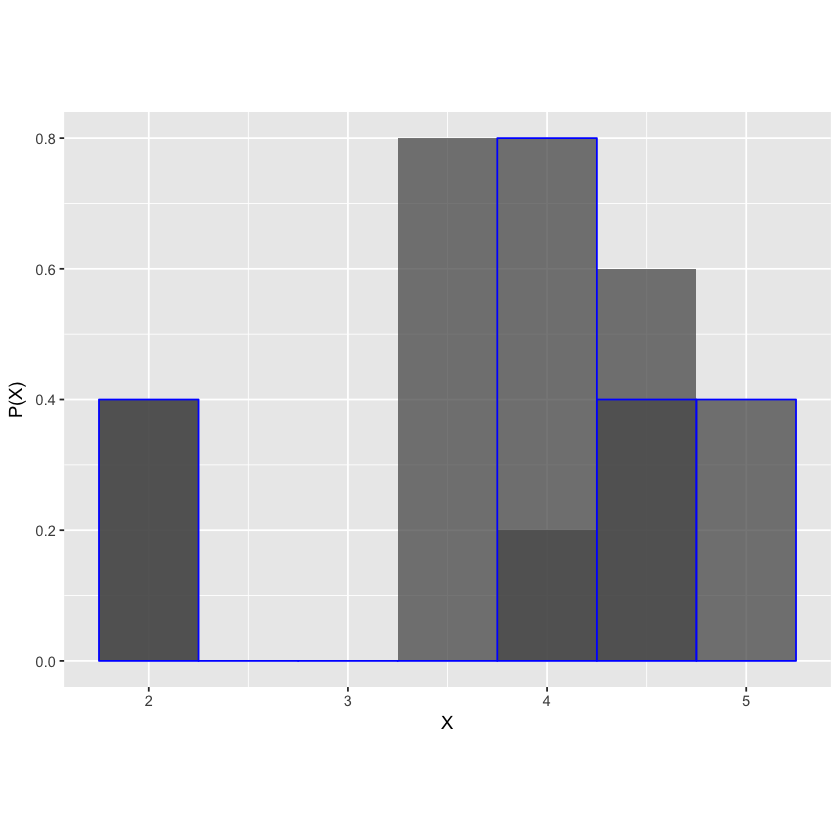

In [215]:
x <- c(3.567, 3.683, 1.833, 4.366, 4, 3.417, 4.7, 4.567, 1.85, 3.333)
y <- c(4.15, 4.5, 4.25, 4.85, 3.817, 4.8, 3.85, 4.567, 1.883, 2.217)

df <- data.frame(x=x, y=y)

ggplot(df) +
    geom_histogram(aes(x=x, y=..density..), binwidth=0.5, alpha=0.75) + 
    geom_histogram(aes(x=y, y=..density..), binwidth=0.5, color=4, alpha=0.75) + 
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

[1] 0.999998

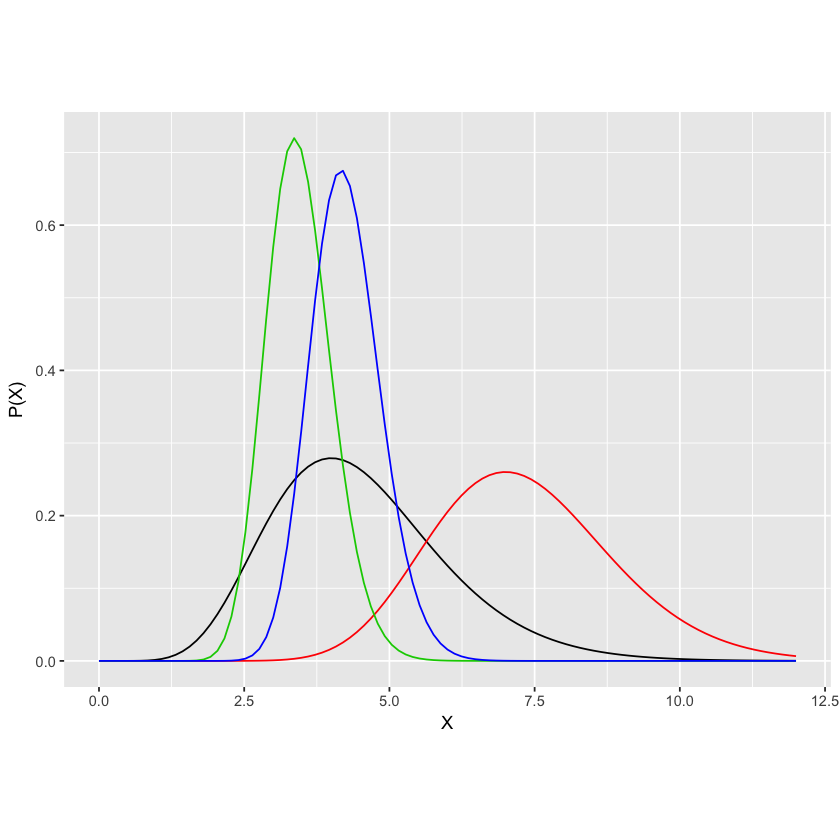

In [44]:
x <- seq(0, 12, length.out = 1000)
gamma_x_data <- data.frame(x=x)
#                            y1=dgamma(x, 1, 2),
#                            y2=dbeta(x, 2, 2),
#                            y3=dbeta(x, 3, 2))

ggplot(gamma_x_data, aes(x=x)) + 
    scale_color_brewer(palette="Dark2") + 
    stat_function(fun=dgamma,args=list(shape=9, rate=2)) +
    stat_function(fun=dgamma,args=list(shape=22, rate=3), color=2) +
    stat_function(fun=dgamma,args=list(shape=38, rate=11), color=3) +
    stat_function(fun=dgamma,args=list(shape=51, rate=12), color=4) +
#     geom_line(aes(y=y1), color=2) + 
#     geom_line(aes(y=y2), color=3) + 
#     geom_line(aes(y=y3), color=4) + 
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

pgamma(10, shape=9, rate=3)

In [46]:
qgamma(0.5, shape=38, rate=11)
qgamma(0.5, shape=51, rate=12)

[1] 3.42429

[1] 4.222255

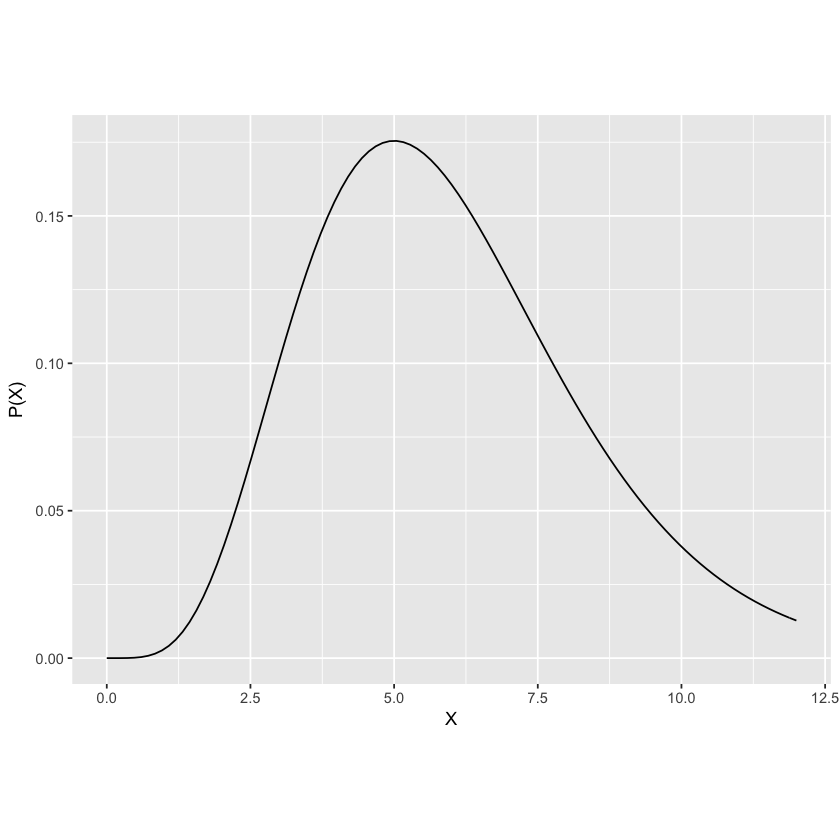

In [51]:
ggplot(gamma_x_data, aes(x=x)) + 
    scale_color_brewer(palette="Dark2") + 
    stat_function(fun=dgamma,args=list(shape=6, rate=1)) +
#     stat_function(fun=dgamma,args=list(shape=22, rate=3), color=2) +
#     stat_function(fun=dgamma,args=list(shape=38, rate=11), color=3) +
#     stat_function(fun=dgamma,args=list(shape=51, rate=12), color=4) +
#     geom_line(aes(y=y1), color=2) + 
#     geom_line(aes(y=y2), color=3) + 
#     geom_line(aes(y=y3), color=4) + 
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

In [52]:
10/0.95

[1] 10.52632